## Modeling 코드
### 주제 1: 머신러닝 기반 매출의 영향 요인 분석
- feature: 버스정류장 개수, 지하철역 개수, 경쟁점 개수, 상업지역 비율, 주거지역 비율, 인구수, 유동인구비율
    - feature Engineer: VIF 확인
- target: 깐부치킨, 생활맥주
    - 깐부치킨: 인구당 매출 > 2500 (성공), 인구당 매출 < 500 (실패)
- y = 성공(1) or 실패(0)

In [191]:
## import module
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## Load Data
gganbu = pd.read_csv("../../../resources/processedData/깐부치킨_입지특성_모델_feature.csv", encoding='utf8')

In [192]:
gganbu

,매장코드,행정동,매장명,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,주거지역 비율,인구수,유동인구비율,인구당매출,y
0,T06644,청담동,(주)깐부 청담본점,13,2,10,0.401674,0.577653,30014,1.42,2662.957,1
1,T50791,세곡동,(주)깐부치킨(세곡점),21,0,7,0.163217,0.779494,45160,0.94,279.949,0
2,T79908,신사동,깐부치킨 신사가로수점,7,0,8,0.320944,0.624547,17541,2.14,3005.986,1
3,S48814,역삼2동,깐부치킨(강남세브란스점),20,0,11,0.285410,0.685366,36560,1.36,402.694,0
4,S35539,삼성1동,깐부치킨(삼성1동점),11,7,9,0.336420,0.648843,14811,3.02,2799.710,1
5,S24077,삼성1동,깐부치킨(삼성점),17,1,21,0.441027,0.558259,14811,3.02,2644.724,1
6,S31130,대치4동,깐부치킨(선릉역1번출구점),21,16,28,0.003526,0.603634,20773,1.62,2582.010,1
7,T74630,신사동,깐부치킨(신사역점),12,8,21,0.368677,0.621461,17541,2.14,3305.399,1
8,T78908,신사동,깐부치킨(압구정한강고수부지),0,0,0,0.034060,0.713664,17541,2.14,393.706,0
9,S42681,신사동,깐부치킨(압구정현대백화점),12,5,9,0.386134,0.595838,17541,2.14,2599.225,1


In [193]:
## Prepare the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# set X,y
X = gganbu[["버스정류장 개수", "지하철역 개수",  "상업지역 비율","경쟁점 개수", "주거지역 비율", "인구수",  "유동인구비율"]]
y = gganbu["y"]

# split into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

# Standardized data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


Accuracy: 0.80


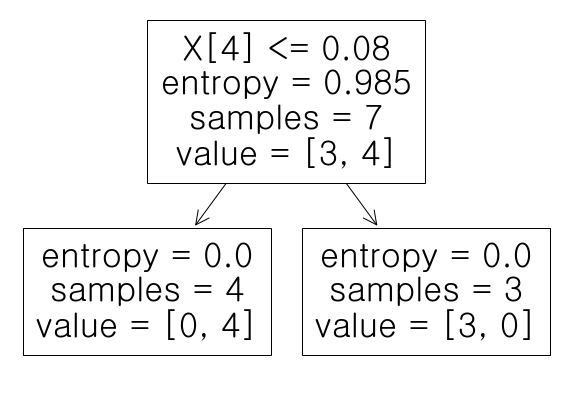

버스정류장 개수 : 0.000
지하철역 개수 : 0.000
상업지역 비율 : 0.000
경쟁점 개수 : 0.000
주거지역 비율 : 1.000
인구수 : 0.000
유동인구비율 : 0.000


<AxesSubplot:>

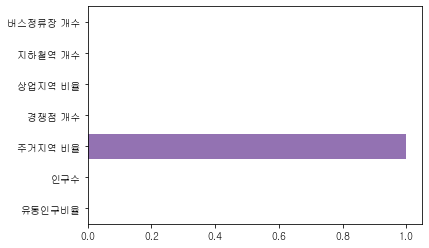

In [194]:
## Decision Tree
from sklearn import tree
ggabu_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
ggabu_tree.fit(X_train_std, y_train)

from sklearn.metrics import accuracy_score

y_pred_tr = ggabu_tree.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(ggabu_tree)
plt.show()

# 특성 중요도 시각화
import seaborn as sns
import numpy as np
%matplotlib inline

# feature별 importance 매핑
for name, value in zip(["버스정류장 개수", "지하철역 개수",  "상업지역 비율","경쟁점 개수", "주거지역 비율", "인구수",  "유동인구비율"] , ggabu_tree.feature_importances_):
    print('{} : {:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=ggabu_tree.feature_importances_ , y=["버스정류장 개수", "지하철역 개수",  "상업지역 비율","경쟁점 개수", "주거지역 비율", "인구수",  "유동인구비율"])

Accuracy: 0.60
[[-0.07345284  0.52125434  0.6527383   0.32301245 -0.70599671 -0.33343015
   0.22615196]]


<AxesSubplot:>

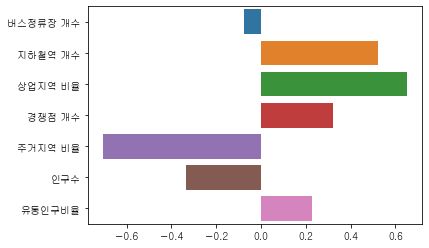

In [195]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

ggabu_lr = LogisticRegression()
ggabu_lr.fit(X_train_std, y_train)

y_pred_lr = ggabu_lr.predict(X_test_std)

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_lr))
print(ggabu_lr.coef_)

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=ggabu_lr.coef_[0] , y=["버스정류장 개수", "지하철역 개수",  "상업지역 비율","경쟁점 개수", "주거지역 비율", "인구수",  "유동인구비율"])

Accuracy: 0.80
[0.0663803  0.19488832 0.21649485 0.11748282 0.25094502 0.11099656
 0.04281214]
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


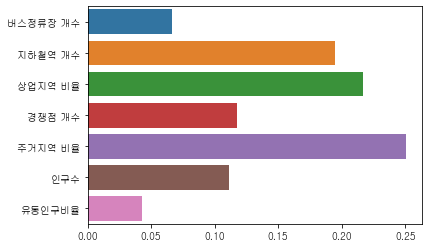

In [212]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

ggabu_rf = RandomForestClassifier(bootstrap=True, random_state = 1)
ggabu_rf.fit(X_train_std, y_train)
y_pred_rf = ggabu_rf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_rf))
print(ggabu_rf.feature_importances_)
# feature importance를 column 별로 시각화 하기 
sns.barplot(x=ggabu_rf.feature_importances_ , y=["버스정류장 개수", "지하철역 개수",  "상업지역 비율","경쟁점 개수", "주거지역 비율", "인구수",  "유동인구비율"])
print(ggabu_rf.get_params())

In [197]:
## Cross-validation 진행 (데이터가 적기때문에 증대 효과 기대)
from sklearn.model_selection import KFold
import numpy as np

# 표준화된 데이터셋
X_std = sc.fit_transform(X)

# cross-validation def 선언
k = 4

import time

# Cross Validation Def
def cross_validation(model, X, y):
  start = time.time() # 시작 시간
  cv_accuracy=[]
  n_iter = 0
  
  for train_index, test_index in KFold(k).split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4) # 소수점 4자리 반올림
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
  print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))

  return cv_accuracy

In [198]:
# Cross-valid 결과
print("***Decision Tree***")
acc_gganbu_dt_cv = cross_validation(ggabu_tree,X_std,y)


***Decision Tree***

#1 교차 검증 정확도 : 0.6667,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#1 검증 세트 인덱스 : [0 1 2]

#2 교차 검증 정확도 : 1.0,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#2 검증 세트 인덱스 : [3 4 5]

#3 교차 검증 정확도 : 0.6667,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#3 검증 세트 인덱스 : [6 7 8]

#4 교차 검증 정확도 : 0.6667,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#4 검증 세트 인덱스 : [ 9 10 11]

## 평균 검증 정확도: 0.750025


In [199]:
print("***Logistic Regression***")
acc_gganbu_lr_cv = cross_validation(ggabu_lr,X_std,y)

***Logistic Regression***

#1 교차 검증 정확도 : 1.0,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#1 검증 세트 인덱스 : [0 1 2]

#2 교차 검증 정확도 : 1.0,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#2 검증 세트 인덱스 : [3 4 5]

#3 교차 검증 정확도 : 0.6667,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#3 검증 세트 인덱스 : [6 7 8]

#4 교차 검증 정확도 : 0.3333,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#4 검증 세트 인덱스 : [ 9 10 11]

## 평균 검증 정확도: 0.75


In [200]:
print("***RandomForest***")
acc_gganbu_xgb_cv = cross_validation(ggabu_rf,X_std,y)

***RandomForest***

#1 교차 검증 정확도 : 0.6667,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#1 검증 세트 인덱스 : [0 1 2]

#2 교차 검증 정확도 : 1.0,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#2 검증 세트 인덱스 : [3 4 5]

#3 교차 검증 정확도 : 0.3333,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#3 검증 세트 인덱스 : [6 7 8]

#4 교차 검증 정확도 : 0.6667,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#4 검증 세트 인덱스 : [ 9 10 11]

## 평균 검증 정확도: 0.666675


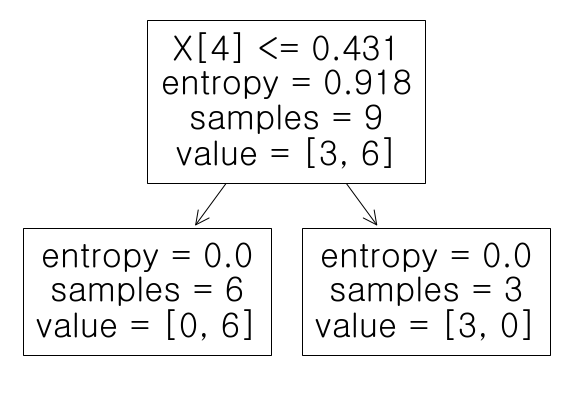

In [201]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(ggabu_tree)
plt.show()